In [1]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline 
from datetime import datetime as dt

# Introduction :
### in this explanatory notebook there are 3 main questions :
### 1-does trip duration effected by member gender ?
### 2-Does customer type have an affect on duration of trip ?
### 3- what is the relationship between duration and age 

# Data Preprocessing 
### The below cells are represnting the preprocessing of the dataset we have , copied from the exploratory notebook 

In [3]:
#loading the data 
data=pd.read_csv('201902-fordgobike-tripdata (1).csv')

In [4]:
#displaying the 5 rows of the data 
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
#summary description of the data 
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
#searching for the null values 
data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#dropping the null values 
data.dropna(axis=0,inplace=True)

In [9]:
#searching for any duplicates 
data.duplicated().sum()

0

In [10]:
#searching for columns values 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [11]:
#transferring coulumns into dates 
data['start_time']=pd.to_datetime(data['start_time'])
data['end_time']=pd.to_datetime(data['end_time'])

In [12]:
#extracting columns from dates 
data['month_day_start']=data['start_time'].dt.day
data['month_start']=data['start_time'].dt.month
data['day_of_week_start']=data['start_time'].dt.weekday

In [13]:
#renaming the weekday column
data['day_of_week_start']=data['day_of_week_start'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

In [14]:
#extracting the hour 
data['start_hour']=data['start_time'].dt.hour

In [15]:
#making the birth year as int instead of float
data['member_birth_year']=data['member_birth_year'].astype('int')

In [16]:
#creating the user age column 
data['user_age']=2021-data['member_birth_year']

In [17]:
#creating the duration of minutes instead of seconds 
data['duration_min']=data['duration_sec']/60

In [18]:
#removing durations longer than 22 mins 
data=data[data['duration_min']<=22]

In [19]:
#removing user age above 55 years 
data=data[data['user_age']<=55]

In [21]:
pd.set_option('display.max_columns', 500)

In [22]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month_day_start,month_start,day_of_week_start,start_hour,user_age,duration_min
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,28,2,Thursday,23,38,19.116667
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992,Male,No,28,2,Thursday,23,29,17.483333
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996,Female,Yes,28,2,Thursday,23,25,7.633333
11,506,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343.0,Bryant St at 2nd St,37.783172,-122.393572,5848,Subscriber,1993,Male,No,28,2,Thursday,23,28,8.433333
12,1176,2019-02-28 23:45:12.651,2019-03-01 00:04:49.184,127.0,Valencia St at 21st St,37.756708,-122.421025,323.0,Broadway at Kearny,37.798014,-122.405950,5328,Customer,1990,Male,No,28,2,Thursday,23,31,19.600000


# Now let's get to Explanatory Analysis 


# Question :
### Does Member gender has an effect on trip duration 

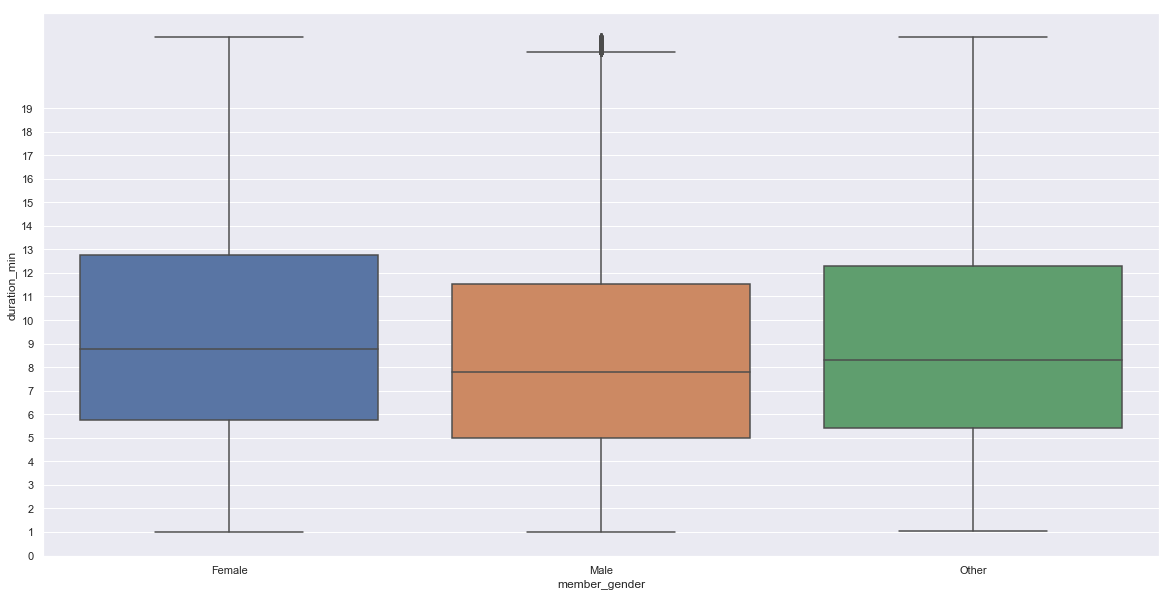

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(data.member_gender,data.duration_min)
plt.yticks(range(0,20))
plt.show()

# Observation :
### Despite about 70% of our customers are males , but on average , females median trip duration is 9 minutes and males median trip duration is only 8 

# Question :
### Does customer type have an affect on duration of trip ?

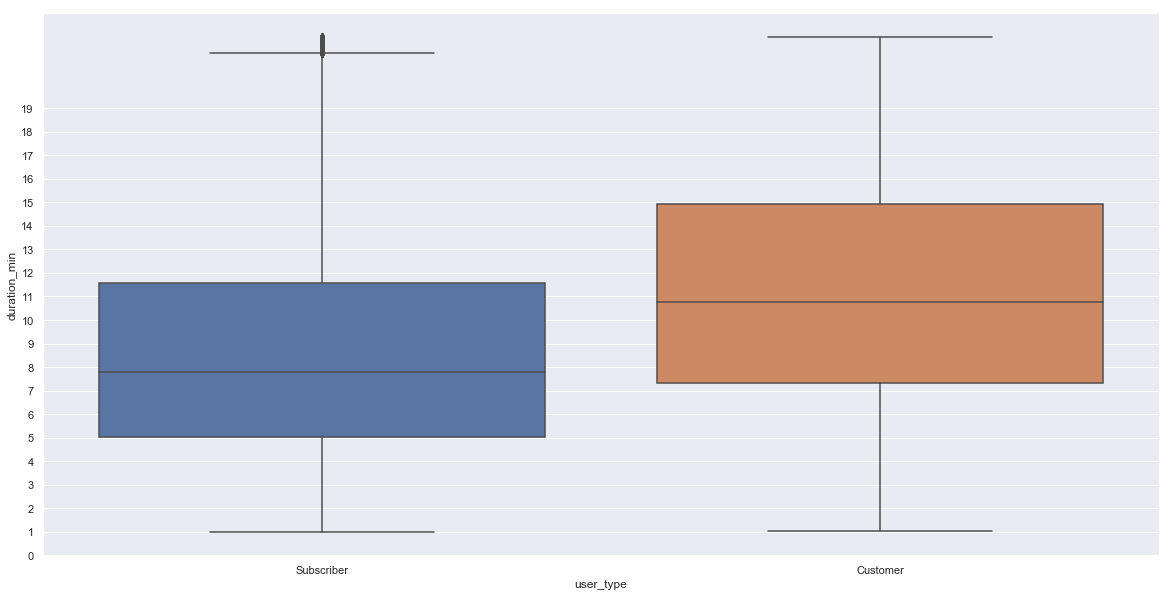

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(data.user_type,data.duration_min)
plt.yticks(range(0,20))
plt.show()

# Observation :
### Despite about the majority of our consumsers are subscribers , the median trip duration of susbcribers are about 8 mins , but the median trip of the customers is 12 mins 

# Relationship between duration and age 

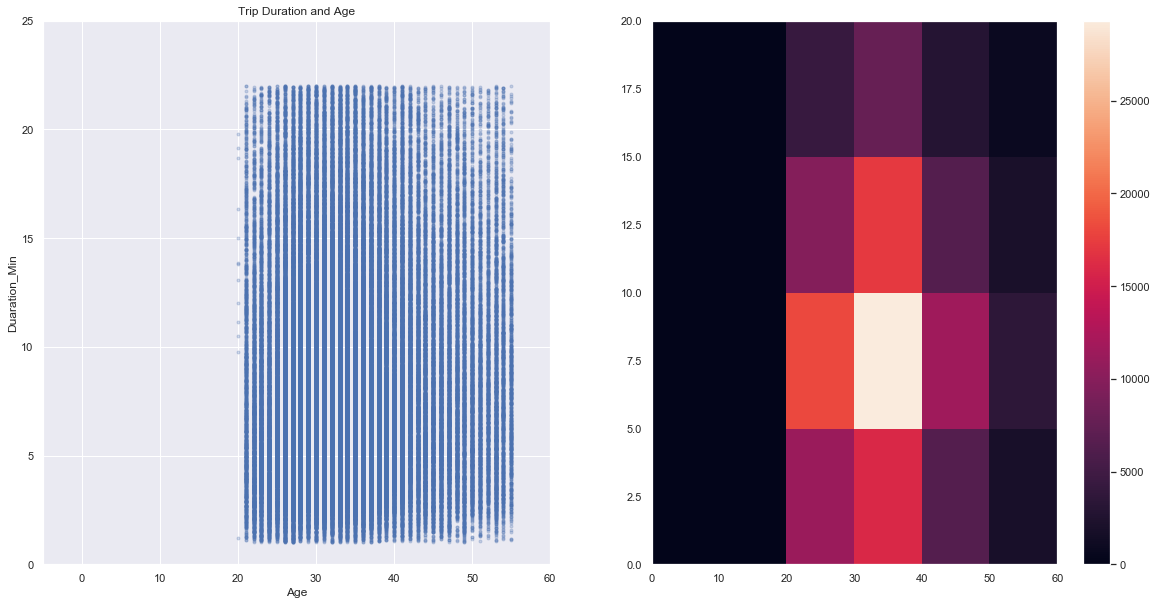

In [67]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.scatter(data.user_age, data.duration_min, alpha = 0.25, marker = '.' )
plt.axis([-5, 60, 0, 25])
plt.title('Trip Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duaration_Min')

plt.subplot(1, 2, 2)
bins_y = np.arange(0, 25, 5)
bins_x = np.arange(0, 60+1, 10)
plt.hist2d(data.user_age, data.duration_min,bins=[bins_x,bins_y])
plt.colorbar();
plt.show()



# Observation :
### the visuaization tells us that most of our trips are by 20-30 years customers and 5:10 minutes 

In [ ]:
!jupyter nbconvert ExplanBikes.ipynb --no-input --to slides --post serve --SlidesExporter.reveal_theme=serif --SlidesExporter.reveal_scroll=True